<a href="https://colab.research.google.com/github/jtkernan7/DS-Unit-2-Regression-1/blob/master/jt_kernan_sprint_6_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import files 
files.upload()


Saving pageviews-20150701-20190527.csv to pageviews-20150701-20190527 (1).csv


{'pageviews-20150701-20190527.csv': b'Date,"CBD"\n2015-07-01,100\n2015-07-02,91\n2015-07-03,98\n2015-07-04,81\n2015-07-05,76\n2015-07-06,110\n2015-07-07,104\n2015-07-08,86\n2015-07-09,124\n2015-07-10,102\n2015-07-11,79\n2015-07-12,74\n2015-07-13,114\n2015-07-14,117\n2015-07-15,122\n2015-07-16,106\n2015-07-17,135\n2015-07-18,114\n2015-07-19,73\n2015-07-20,135\n2015-07-21,119\n2015-07-22,122\n2015-07-23,105\n2015-07-24,104\n2015-07-25,77\n2015-07-26,105\n2015-07-27,105\n2015-07-28,112\n2015-07-29,124\n2015-07-30,131\n2015-07-31,102\n2015-08-01,85\n2015-08-02,94\n2015-08-03,115\n2015-08-04,104\n2015-08-05,109\n2015-08-06,112\n2015-08-07,91\n2015-08-08,95\n2015-08-09,93\n2015-08-10,121\n2015-08-11,128\n2015-08-12,131\n2015-08-13,120\n2015-08-14,144\n2015-08-15,104\n2015-08-16,92\n2015-08-17,138\n2015-08-18,159\n2015-08-19,141\n2015-08-20,127\n2015-08-21,150\n2015-08-22,145\n2015-08-23,96\n2015-08-24,120\n2015-08-25,97\n2015-08-26,108\n2015-08-27,98\n2015-08-28,122\n2015-08-29,89\n2015-08-3

In [0]:
import pandas as pd 
df = pd.read_csv('pageviews-20150701-20190527.csv')

In [0]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [6]:
df.shape

(1427, 2)

In [20]:
df.head()

,CBD
Date,
2015-07-01,100
2015-07-02,91
2015-07-03,98
2015-07-04,81
2015-07-05,76


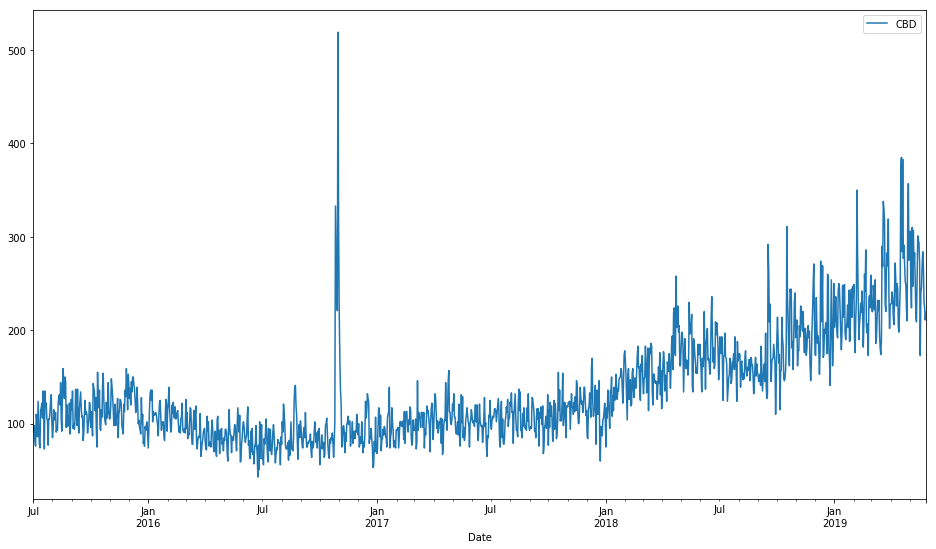

In [21]:
df.plot(figsize=(16,9));

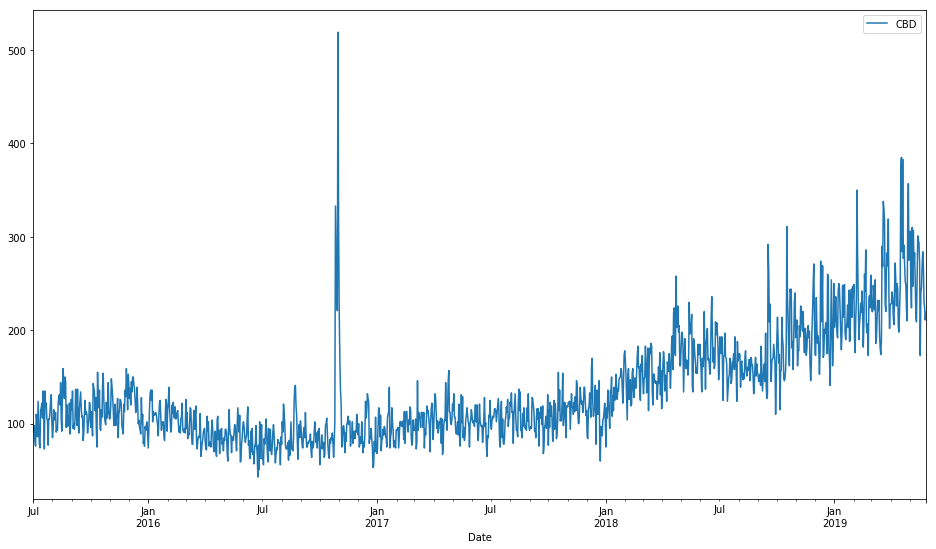

In [22]:
pd.date_range(start='2015-07-01', end ='2020-05-23')
df.plot(figsize =(16,9));

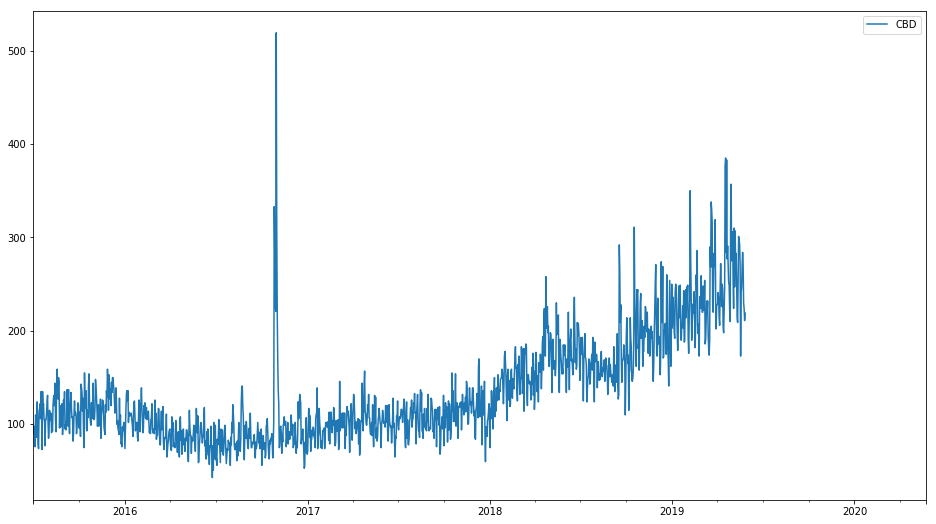

In [23]:
df = df.reindex(pd.date_range(start='2015-07-01', end='2020-05-23'))
df.plot(figsize=(16,9));

In [24]:
df['CBD'].mean()

133.906096706377

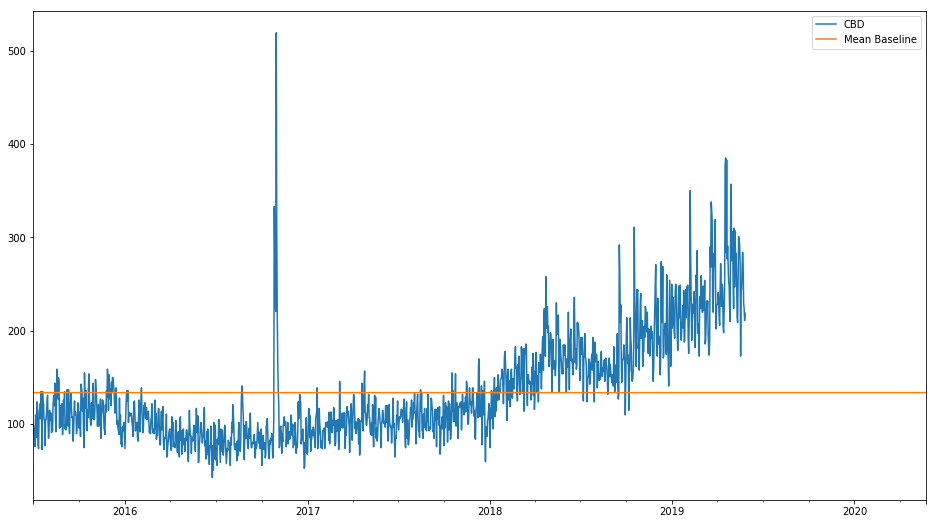

In [25]:
df['Mean Baseline'] = df['CBD'].mean()
df.plot(figsize=(16,9));

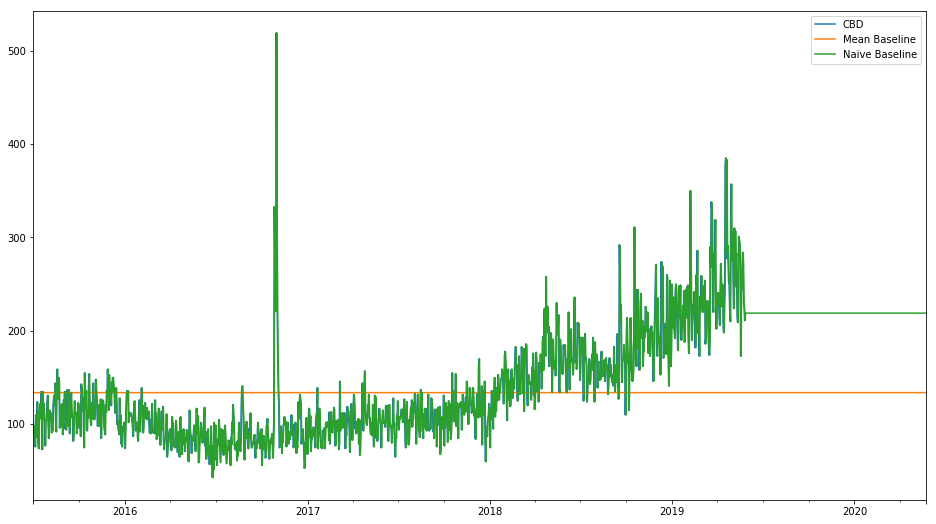

In [26]:
df['Naive Baseline'] = df['CBD'].shift(1).ffill()
df.plot(figsize=(16,9));

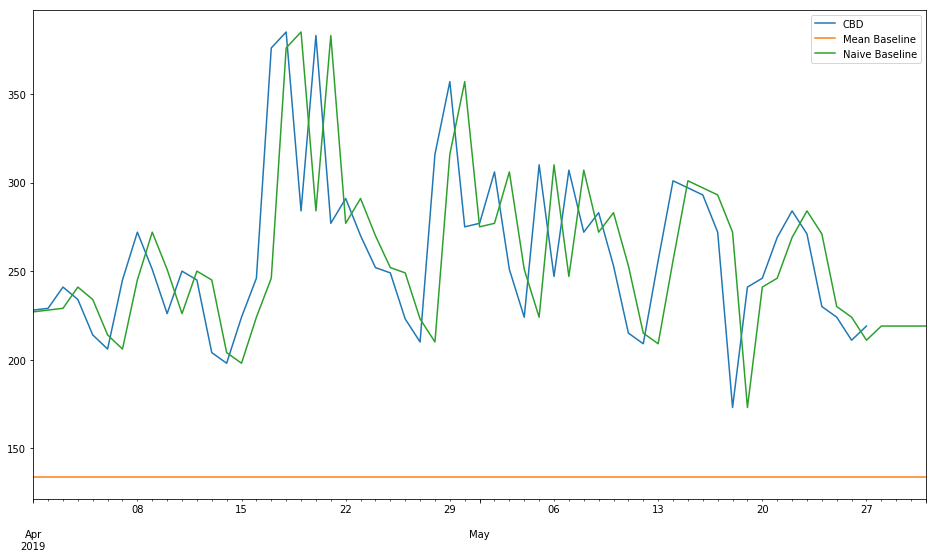

In [27]:
df['2019-04':'2019-05'].plot(figsize=(16,9));

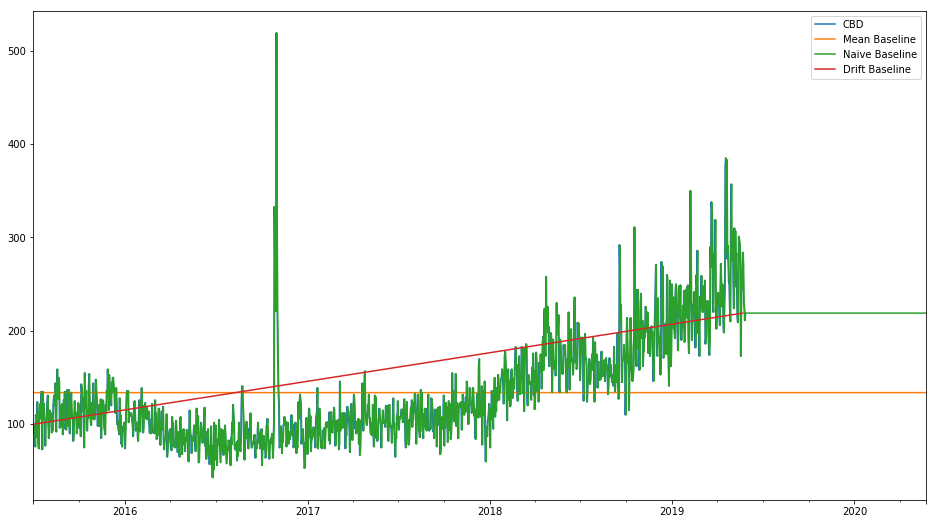

In [28]:
import numpy as np
df['Drift Baseline'] = np.nan
df.loc['2015-07-01', 'Drift Baseline'] = df.loc['2015-07-01', 'CBD']
df.loc['2019-05-22', 'Drift Baseline'] = df.loc['2019-05-27', 'CBD']
df['Drift Baseline'] = df['Drift Baseline'].interpolate(limit_area='inside')
df.plot(figsize=(16,9));

In [0]:
df = df.reset_index().rename(columns={'index': 'ds', 'CBD': 'y'})

In [30]:
from fbprophet import Prophet
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [31]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
2149,2021-05-19
2150,2021-05-20
2151,2021-05-21
2152,2021-05-22
2153,2021-05-23


In [0]:
forecast = m.predict(future)

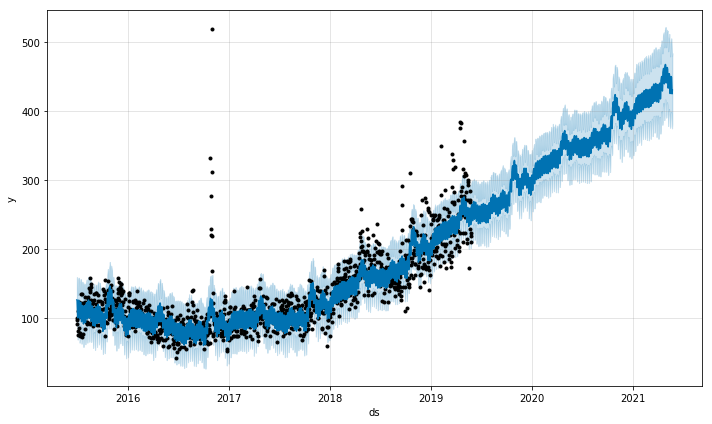

In [33]:
fig1 = m.plot(forecast)

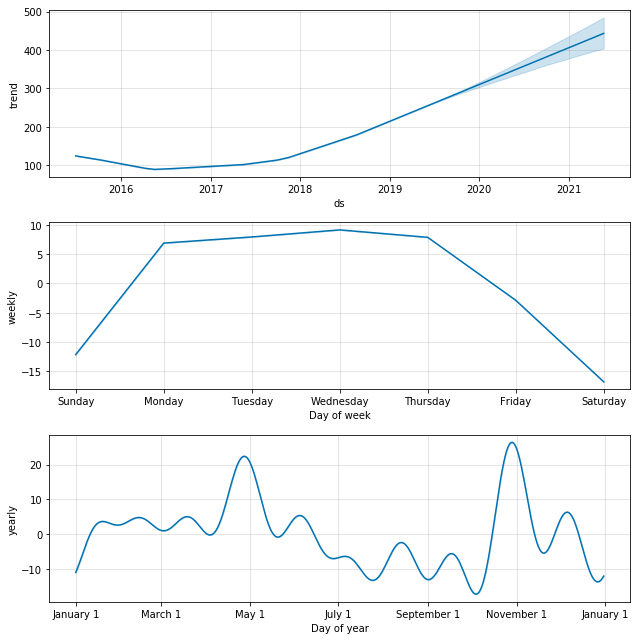

In [34]:
fig2 = m.plot_components(forecast)